
<table style="width:100%">
    <tr>
        <td><b style="font-size:30px;text-align:left">Guía 4 Modelo Lineal</b></td>
        <td><b style="font-size:30px"><img src="logo_unab1.jpg" align="right" width="100"/></b></td>
    </tr>
    <tr>
        <td><span style="color:green"><b>Minería de datos empresariales</b></span></td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, classification_report


# 1.0 Regresión lineal múltiple

### 1.1 Carga de datos

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### 1.2 Revisar valores ausentes

In [3]:
df.shape

(10000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df['Sample Question Papers Practiced'].nunique()

10

### 1.3 Análisis  de Correlación

In [6]:
vcontinuas = df.drop(columns='Extracurricular Activities').columns
mcorr = df.loc[:, vcontinuas].corr(method='pearson')

mcorr

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


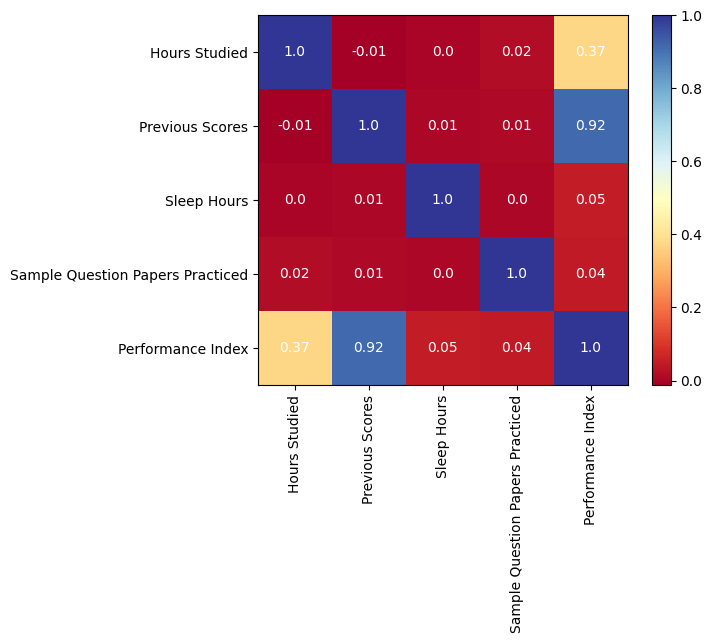

In [7]:
_, ax = plt.subplots()
im = ax.imshow(mcorr, cmap='RdYlBu')
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(vcontinuas)), labels=vcontinuas, rotation=90)
ax.set_yticks(np.arange(len(vcontinuas)), labels=vcontinuas, rotation=0)

for i in range(len(vcontinuas)):
    for j in range(len(vcontinuas)):
        vcorr = np.round(mcorr.loc[vcontinuas[i], vcontinuas[j]], 2)
        ax.text(i, j, vcorr, ha='center', va='center', color='w')

# sns.heatmap(mcorr, cmap='RdYlBu', annot=True)

<Axes: >

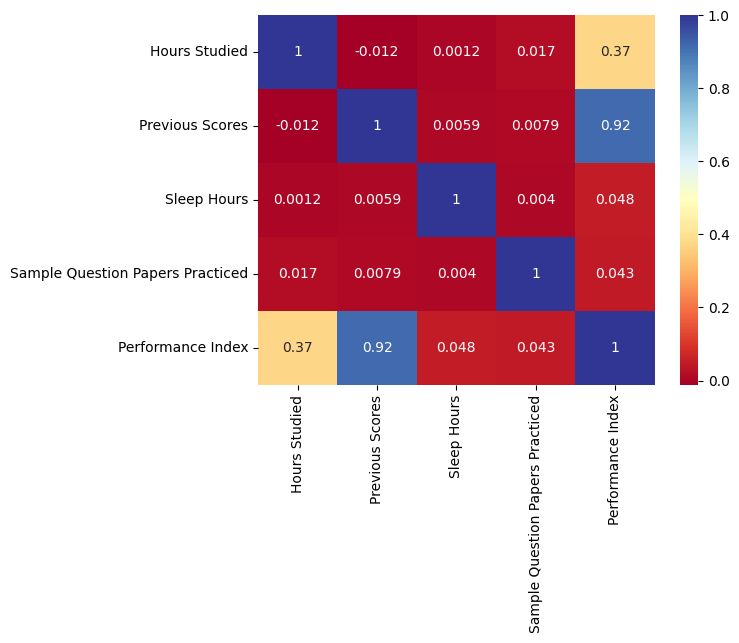

In [8]:
import seaborn as sns

sns.heatmap(mcorr, cmap='RdYlBu', annot=True, )


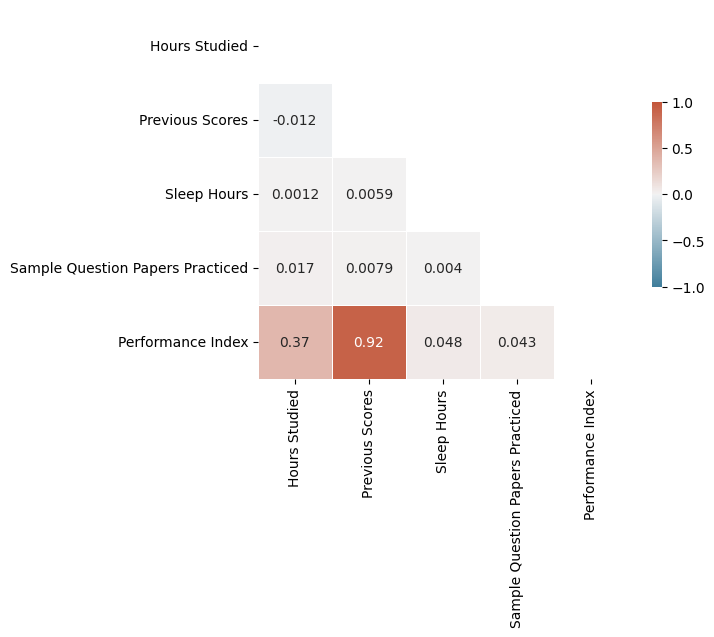

In [9]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(mcorr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mcorr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

### 1.4 Análisis de distribución de variables

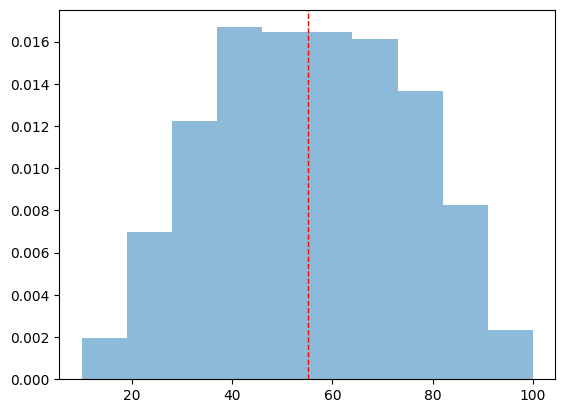

In [10]:
plt.hist(df['Performance Index'], alpha=.5, density=True)
plt.axvline(x=np.mean(df['Performance Index']), color='red', lw=1, ls='--');

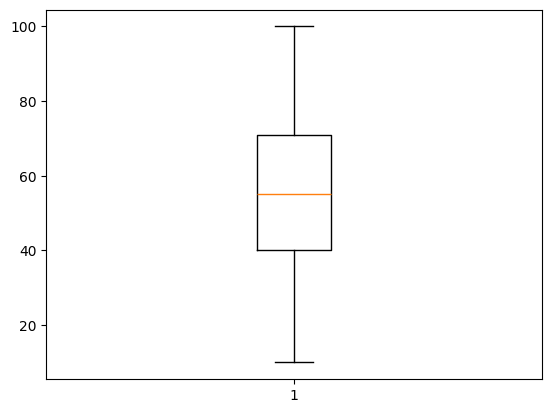

In [11]:
plt.boxplot(df['Performance Index']);

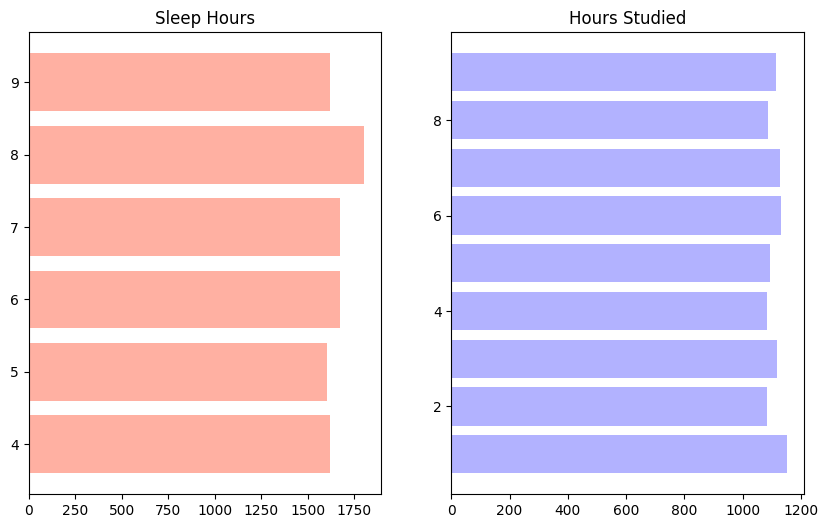

In [12]:
df_shours = df['Sleep Hours'].value_counts()
df_studied = df['Hours Studied'].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

ax[0].barh(y=df_shours.index, width=df_shours.values, color='tomato', alpha=.5)
ax[0].set_title('Sleep Hours')

ax[1].barh(y=df_studied.index, width=df_studied.values, color='blue', alpha=.3)
ax[1].set_title('Hours Studied');


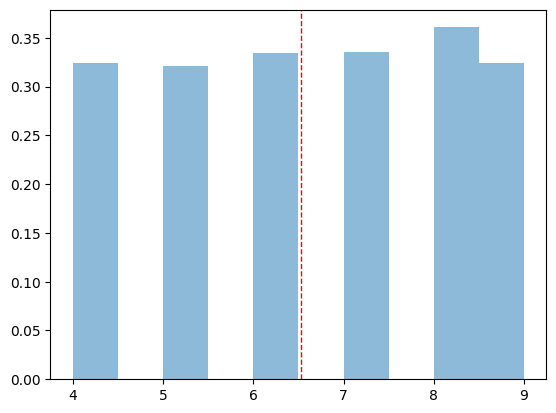

In [13]:
plt.hist(df['Sleep Hours'], alpha=.5, density=True)
plt.axvline(x=np.mean(df['Sleep Hours']), color='red', lw=1, ls='--');


### 1.5 Transformación de variables

In [14]:
df = pd.get_dummies(data=df, columns=['Extracurricular Activities'], drop_first=True, dtype='int')
df.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


### 1.6 División en entrenamiento y test

In [20]:
np.random.seed(seed=23)
np.random.randint(1, 10, size=5)

array([4, 7, 9, 7, 9])

In [22]:
X = df.drop(columns='Performance Index')
y = df['Performance Index']

RANDOM_STATE = 56

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.33, random_state=RANDOM_STATE
)

print(f'dimensiones X_train: {X_train.shape}')
print(f'dimensiones X_test: {X_test.shape}')


dimensiones X_train: (6700, 5)
dimensiones X_test: (3300, 5)


### 1.7 Entrenamiento del modelo

In [24]:
X_train.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Extracurricular Activities_Yes'],
      dtype='object')

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

beta0 = lr_model.intercept_
coefs = lr_model.coef_

print(f'Intercepto: {beta0}')
print(f'Coeficientes: {coefs}')


Intercepto: -34.234061975697585
Coeficientes: [2.85840385 1.01853046 0.50059955 0.19402037 0.60407203]



$$
\LARGE{
y = -34.2341 + 2.8584x_1 + 1.01853x_2 + 0.5006x_3+ 0.1940x_4 + 0.6041x_5
}
$$

### 1.8 Predicción sobre el conjunto de test y calidad de ajuste

In [25]:
X_test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
4941,9,78,7,7,1
5927,3,79,4,9,1
8947,4,96,9,6,0
482,8,95,7,8,0
8268,8,56,9,5,0
...,...,...,...,...,...
4316,9,56,5,7,0
2118,6,44,7,7,1
5206,8,51,5,2,0
8475,5,81,8,0,0


In [26]:
y_pred = lr_model.predict(X_test)
y_pred

array([76.40336031, 59.15770979, 80.64799613, ..., 43.46926095,
       66.56372125, 42.68879771])

In [27]:
y_test

,Performance Index
4941,76.0
5927,64.0
8947,78.0
482,89.0
8268,52.0
...,...
4316,57.0
2118,33.0
5206,44.0
8475,68.0


In [34]:
y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación R2: {r2}')


Coeficiente de determinación R2: 0.9892180927814863


### 1.9 Predicción puntual

In [30]:
y_true = 60.0
new_obs = pd.DataFrame({
    'Hours Studied': [2],
    'Previous Scores': [80],
    'Sleep Hours': [7],
    'Sample Question Papers Practiced': [2],
    'Extracurricular Activities_Yes': [1]
})

new_obs


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,2,80,7,2,1


In [31]:
y_pred_new = lr_model.predict(new_obs)
y_pred_new

array([57.46149247])

In [32]:
(y_true - y_pred_new)

array([2.53850753])

In [ ]:
y_test

Text(0, 0.5, 'Residuo')

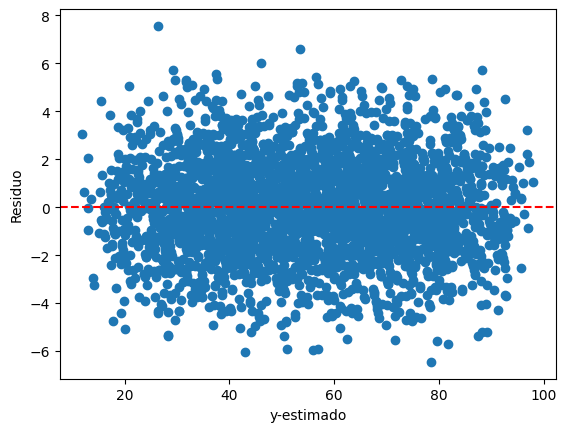

In [41]:
residuo = y_test - y_pred

plt.scatter(y_pred, residuo)
plt.axhline(y=0, c='r', ls='--');
plt.xlabel('y-estimado')
plt.ylabel('Residuo')
#plt.axhline(y=np.mean(residuo), c='r', ls='--')
#print(f'Residuo: {residuo}')


(array([ 17., 110., 306., 675., 905., 769., 356., 125.,  35.,   2.]),
 array([-6.45157757, -5.0509759 , -3.65037423, -2.24977256, -0.84917089,
         0.55143078,  1.95203245,  3.35263411,  4.75323578,  6.15383745,
         7.55443912]),
 <BarContainer object of 10 artists>)

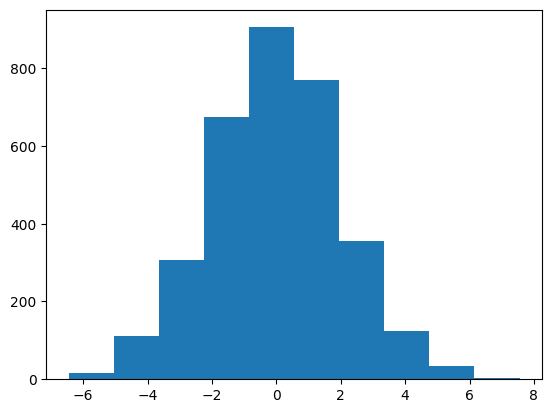

In [72]:
plt.hist(residuo)

# 3.0 Support Vector Machine (SVM)

### 3.1 Carga de imágenes usando librería mlxtend.data

In [ ]:
#!pip install mlxtend
from mlxtend.data import loadlocal_mnist

file_path_X_train = 'mnist/train-images.idx3-ubyte'
file_path_y_train = 'mnist/train-labels.idx1-ubyte'

file_path_X_test = 'mnist/t10k-images.idx3-ubyte'
file_path_y_test = 'mnist/t10k-labels.idx1-ubyte'


### 3.2 Se seleccionan sólo 6.000 imágenes para entrenar de un total de 60.000 y 1.000 para test (10.000)

In [43]:
N_train = 6000
N_test = 1000
X_train, y_train = loadlocal_mnist(file_path_X_train, file_path_y_train)
X_test, y_test = loadlocal_mnist(file_path_X_test, file_path_y_test)

idx_train = np.random.choice(range(X_train.shape[0]), N_train, replace=False)
idx_test = np.random.choice(range(X_test.shape[0]), N_test, replace=False)

X_train = X_train[idx_train]
y_train = y_train[idx_train]

X_test = X_test[idx_test]
y_test = y_test[idx_test]

print(f'Dim X_train: {X_train.shape}')
print(f'Dim X_test: {X_test.shape}')



Dim X_train: (6000, 784)
Dim X_test: (1000, 784)


In [45]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### 3.3 Se muestra imágenes aleatorias de acuerdo a cantidad de filas y columnas

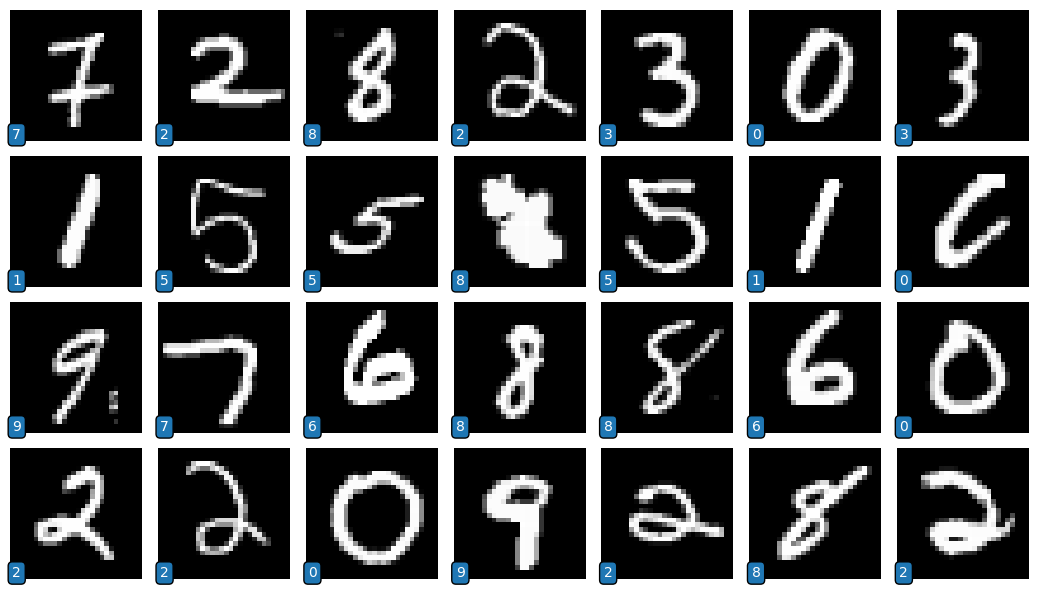

In [47]:
def plot_random_image(nrows, ncols, images, y_image, predictions=np.array([])):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(1.5*ncols, 1.5*nrows))

    idx_random = np.random.choice(range(images.shape[0]), replace=False, size=nrows*ncols)
    for i in range(nrows):
        for j in range(ncols):
            idx_image = idx_random[i*(ncols)+j]
            #print({i*(j+1)+j})
            ax[i, j].imshow(images[idx_image].reshape(28, 28), cmap='grey')
            ax[i, j].text(0, 27, y_image[idx_image], color='white', fontsize=10, bbox=dict(boxstyle='round'))
            ax[i, j].axis('off')

            if predictions.shape[0] > 0:
                color_ = 'red'
                if y_image[idx_image] == predictions[idx_image]:
                    color_ = 'green'
                ax[i, j].text(5, 27, f'{predictions[idx_image]}', color='white', fontsize=10, alpha=1, bbox=dict(boxstyle='round', facecolor=color_))


    plt.tight_layout()
    plt.show();


plot_random_image(4, 7, X_train, y_train)



### 3.4 Entrenamos un modelo de Support Vector Machine usando kernel linear y C=0.02

In [48]:
%%time
svc_model = SVC(C=0.02, kernel='linear', gamma='auto', verbose=False)
svc_model.fit(X_train, y_train)


CPU times: user 2.31 s, sys: 10.3 ms, total: 2.32 s
Wall time: 2.31 s


SVC(C=0.02, gamma='auto', kernel='linear')

### 3.5 Se realiza la predicción para los registros del conjunto de test

In [49]:
y_pred = svc_model.predict(X_test)
y_pred


array([0, 3, 3, 9, 6, 2, 1, 7, 1, 1, 8, 6, 4, 9, 4, 4, 3, 1, 6, 5, 7, 9,
       0, 4, 7, 2, 0, 9, 0, 8, 0, 1, 0, 1, 5, 4, 8, 2, 9, 3, 9, 8, 4, 7,
       6, 5, 1, 2, 8, 0, 9, 0, 8, 6, 3, 3, 0, 3, 7, 6, 8, 2, 1, 4, 7, 9,
       5, 5, 1, 3, 3, 7, 2, 8, 8, 3, 7, 0, 1, 0, 8, 0, 0, 3, 0, 8, 7, 8,
       1, 5, 1, 7, 2, 4, 3, 2, 6, 9, 2, 6, 1, 1, 7, 1, 7, 3, 5, 6, 5, 0,
       5, 8, 2, 3, 9, 8, 6, 7, 4, 0, 0, 7, 4, 2, 9, 5, 9, 5, 6, 0, 9, 4,
       6, 2, 5, 3, 7, 6, 3, 0, 1, 1, 0, 1, 2, 2, 6, 6, 2, 3, 0, 7, 7, 2,
       2, 3, 9, 0, 2, 9, 4, 6, 0, 0, 4, 3, 1, 4, 5, 2, 4, 5, 4, 3, 6, 6,
       8, 9, 1, 0, 4, 9, 8, 3, 4, 6, 9, 5, 5, 7, 9, 2, 7, 0, 1, 9, 9, 1,
       7, 4, 7, 7, 9, 6, 2, 6, 6, 2, 4, 7, 4, 3, 4, 0, 3, 8, 6, 8, 0, 3,
       4, 6, 8, 1, 9, 0, 6, 7, 2, 9, 6, 8, 2, 4, 1, 8, 4, 2, 7, 1, 5, 3,
       6, 8, 2, 4, 4, 6, 4, 1, 1, 2, 7, 3, 4, 6, 6, 6, 3, 6, 7, 1, 2, 6,
       9, 9, 4, 1, 4, 6, 5, 9, 1, 1, 8, 3, 9, 7, 2, 9, 7, 3, 8, 1, 8, 7,
       8, 5, 9, 8, 7, 2, 6, 4, 4, 9, 5, 9, 8, 3, 0,

### 3.6 Se muestran una cantidad dada de imágenes seleccionadas aleatoriamente con su predicción

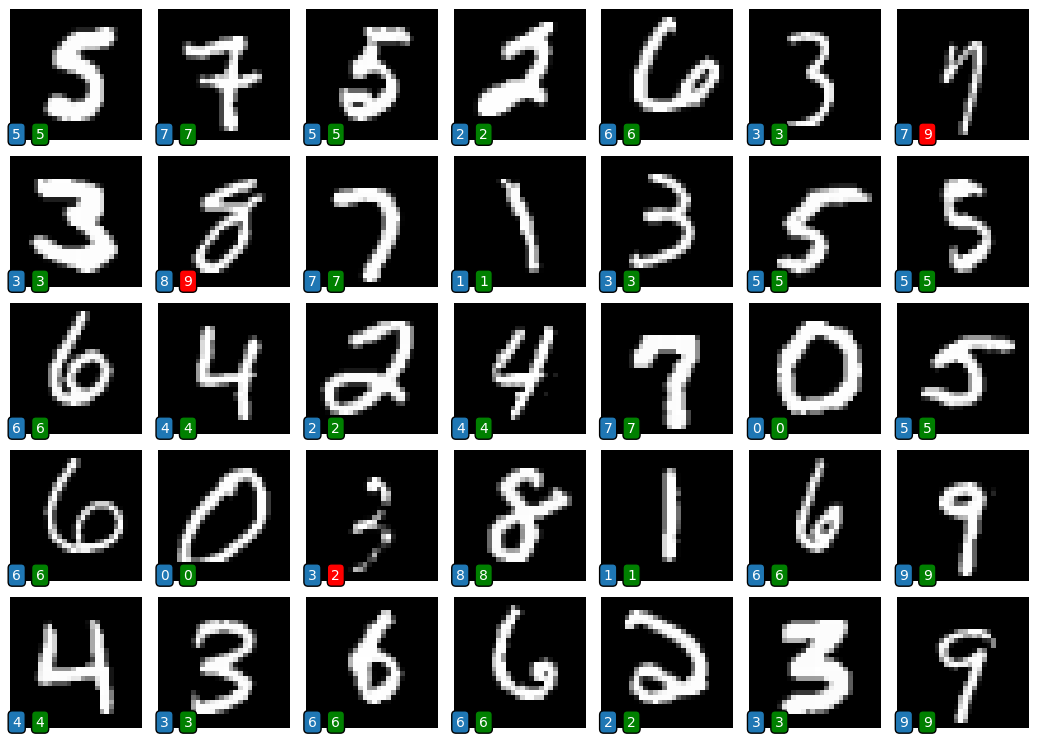

In [52]:
plot_random_image(5, 7, X_test, y_test, predictions=y_pred)

### 3.7 Se evalua el modelo clasificación usando métrica de exactitud

In [53]:
accuracy_score(y_test, y_pred)

0.929

In [71]:
lst_c = np.linspace(0.01, 0.8, 20)
lst_c

array([0.01      , 0.05157895, 0.09315789, 0.13473684, 0.17631579,
       0.21789474, 0.25947368, 0.30105263, 0.34263158, 0.38421053,
       0.42578947, 0.46736842, 0.50894737, 0.55052632, 0.59210526,
       0.63368421, 0.67526316, 0.71684211, 0.75842105, 0.8       ])

In [67]:
%%time
lst_c = np.linspace(0.01, 0.8, 0.2)


svc_rbf_model = SVC(C=0.7, kernel='rbf', gamma=0.002, verbose=False)
svc_rbf_model.fit(X_train, y_train)



CPU times: user 22.2 s, sys: 44.7 ms, total: 22.2 s
Wall time: 22.3 s


SVC(C=0.7, gamma=0.002)

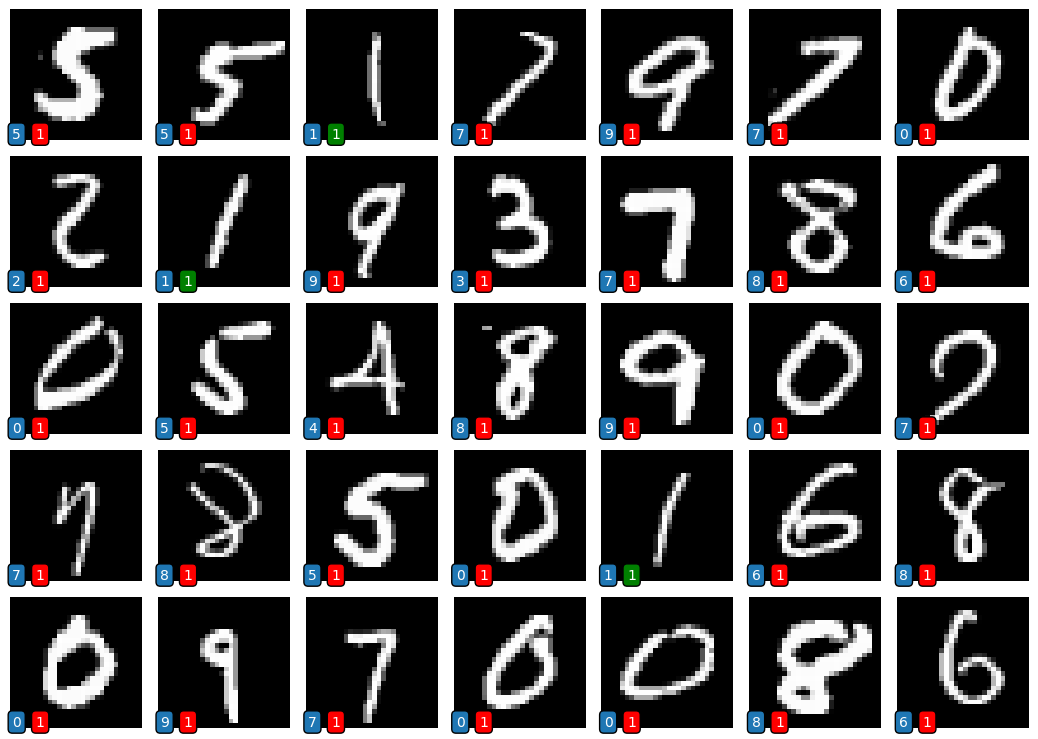

In [66]:
y_pred = svc_rbf_model.predict(X_test)
plot_random_image(5, 7, X_test, y_test, predictions=y_pred)


In [58]:
accuracy_score(y_test, y_pred)

0.101